In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import s3fs

In [2]:
s3 =s3fs.S3FileSystem(key='minio',secret='minio123',client_kwargs={"endpoint_url":'http://localhost:9000'})
raw = pq.ParquetDataset('kafka/topics/device-parameter-windowed/partition=0/', filesystem=s3).read_pandas().to_pandas()

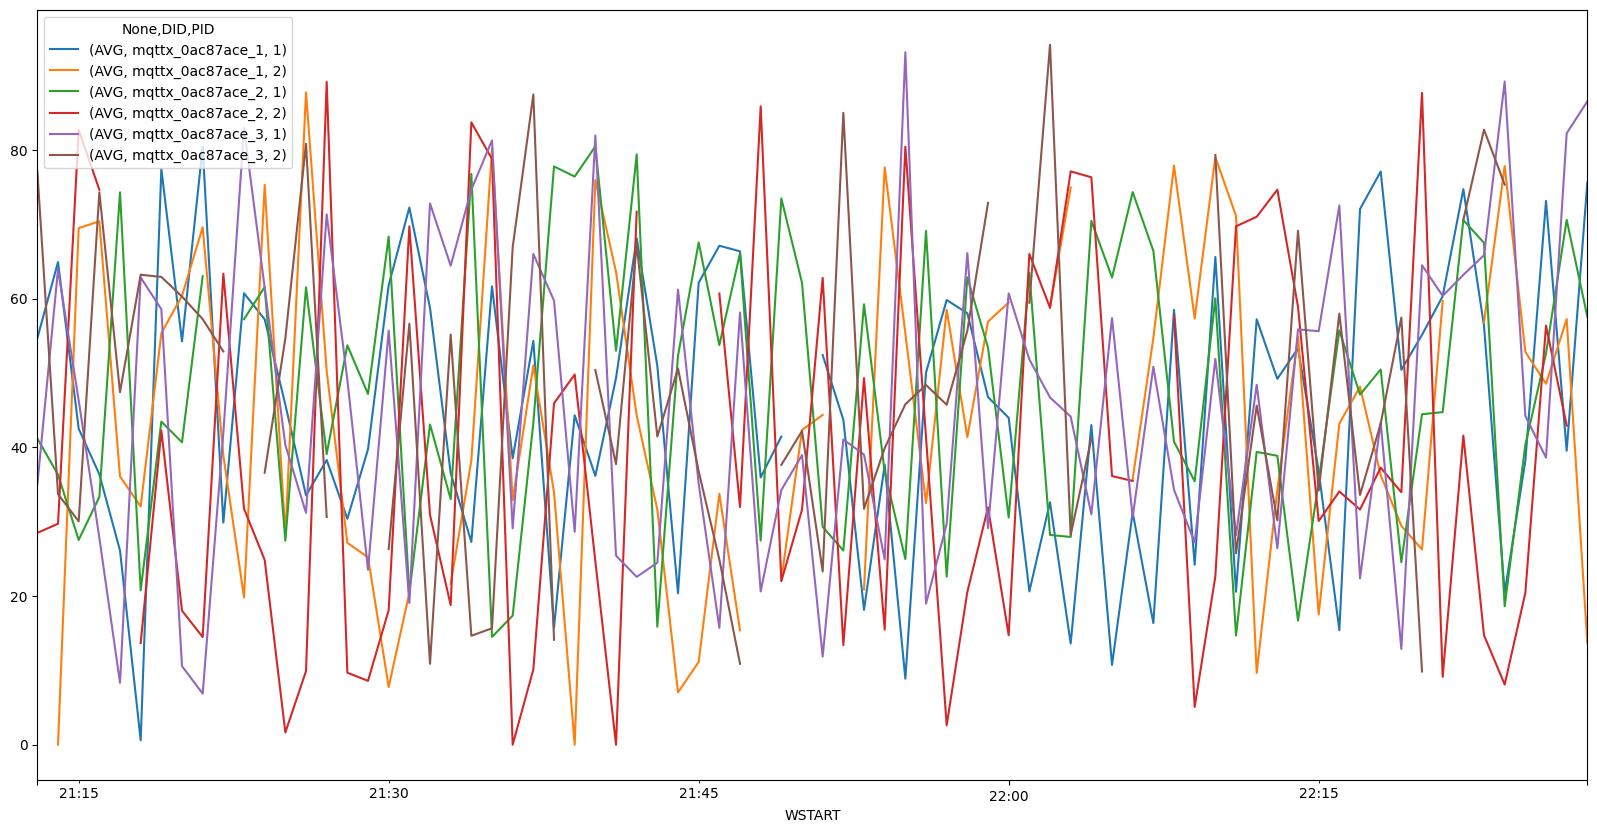

In [3]:
pivot = raw.pivot_table(index=["WSTART"], columns=["DID", "PID"], values=["AVG"])
pivot.plot(figsize=(20,10))
plt.show()